<a href="https://colab.research.google.com/github/kirill-kozlitin/test_tasks/blob/main/%D0%9A%D0%BE%D0%B2%D0%BE%D1%80%D0%BA%D0%B8%D0%BD%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Погнали

Попробуем расчитать наиболее выгодную комбинацию факторов для коворкинга

Для этого, создадим все возможные комбинации факторов, которые влияют на прибыль.

1. Площадь помещения, s
1. Цена за м2, price_perm2
1. Количество рабочих мест в openspace, nwork_open
1. Планируемая площадь для р/места в openspace, s_open
1. Количество рабочих мест в офисах, nwork_office
1. Планируемая площадь для р/места в офисе, s_office
1. Цена за день работы в openspace, price_open
1. Цена за месяц работы в офисе, price_office
1. Средняя ежедневная загрузка в %, occupancy
1. Сумма комунальных платежей, sum_eng
1. Ежемесячные расходы на интернет, уборку и охрану, expenses
1. Учесть налоги, tax

In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
#

# # Выведите результат
# for combination in all_combinations:
#     print(combination)
# Этот код создаст все возможные комбинации
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Площадь помещения, s
s = [i for i in range(70, 120, 10)]
print('Площадь помещения:', s)

price_perm2 = [i for i in range(1000, 2200, 200)]
print('Цена за м2:', price_perm2)

nwork_open = [i for i in range(5, 30)]
print('Количество рабочих мест в openspace:', nwork_open)

s_open = [round(i, 1) for i in np.arange(4, 6.5, 0.5)]
print('Планируемая площадь для р/места в openspace:', s_open)

nwork_office = [i for i in range(0, 6, 1)]
print('Количество рабочих мест в офисах:', nwork_office)

s_office = [i for i in range(6, 8, 1)]
print('Планируемая площадь для р/места в офисе:', s_office)

price_open = [i for i in range(8000, 10500, 500)]
print('Цена за месяц работы в openspace:', price_open)

price_office = [i for i in range(15000, 20000, 1000)]
print('Цена за месяц работы в офисе:', price_office)

occupancy = [round(i, 1) for i in np.arange(0.2, 0.9, 0.1)]
print('Средняя ежедневная загрузка:', occupancy)

sum_eng = [10000]
print('Сумма комунальных платежей:', sum_eng)

expenses = [5000 + 20000]
print('Ежемесячные расходы на интернет, уборку', expenses)

Площадь помещения: [70, 80, 90, 100, 110]
Цена за м2: [1000, 1200, 1400, 1600, 1800, 2000]
Количество рабочих мест в openspace: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Планируемая площадь для р/места в openspace: [4.0, 4.5, 5.0, 5.5, 6.0]
Количество рабочих мест в офисах: [0, 1, 2, 3, 4, 5]
Планируемая площадь для р/места в офисе: [6, 7]
Цена за месяц работы в openspace: [8000, 8500, 9000, 9500, 10000]
Цена за месяц работы в офисе: [15000, 16000, 17000, 18000, 19000]
Средняя ежедневная загрузка: [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
Сумма комунальных платежей: [10000]
Ежемесячные расходы на интернет, уборку [25000]


In [4]:
# создаем все комбинации
all_combinations = list(itertools.product(s,
                                          price_perm2,
                                          nwork_open,
                                          s_open,
                                          nwork_office,
                                          s_office,
                                          price_open,
                                          price_office,
                                          occupancy,
                                          sum_eng,
                                          expenses))

In [5]:
df = pd.DataFrame(data=all_combinations, columns=['Площадь помещения',
                                               'Цена за м2',
                                               'Количество рабочих мест в openspace',
                                               'Планируемая площадь для р/места в openspace',
                                               'Количество рабочих мест в офисах',
                                               'Планируемая площадь для р/места в офисе',
                                               'Цена за месяц работы в openspace',
                                               'Цена за месяц работы в офисе',
                                               'Средняя ежедневная загрузка',
                                               'Сумма комунальных платежей',
                                               'Ежемесячные расходы'])
df.shape

(7875000, 11)

In [6]:
df['Общая занимаемая площадь'] = df['Количество рабочих мест в openspace'] * df['Планируемая площадь для р/места в openspace'] + \
                                 df['Количество рабочих мест в офисах'] * df['Планируемая площадь для р/места в офисе']

In [7]:
# уберем комбинации, в которых площадь занимаемая всеми работниками больше допустимой
df = df.loc[df['Площадь помещения'] > df['Общая занимаемая площадь']]
df.shape

(3290700, 12)

In [8]:
 # уберем комбинации, в которых площадь занимаемая всеми работниками составляет меньше 90% от допустимой
 df = df.loc[df['Общая занимаемая площадь'] / df['Площадь помещения'] > 0.9]
df.shape

(511350, 12)

In [9]:
df['Доходы, руб'] = np.ceil((df['Количество рабочих мест в openspace'] * df['Цена за месяц работы в openspace']) * df['Средняя ежедневная загрузка']) + \
                    np.ceil((df['Количество рабочих мест в офисах'] * df['Цена за месяц работы в офисе']) * df['Средняя ежедневная загрузка'])

<ipython-input-9-4f9cee41d70c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Доходы, руб'] = np.ceil((df['Количество рабочих мест в openspace'] * df['Цена за месяц работы в openspace']) * df['Средняя ежедневная загрузка']) + \


In [10]:
df['Расходы, руб'] = df['Площадь помещения'] * df['Цена за м2'] + \
                     df['Сумма комунальных платежей'] + \
                     df['Ежемесячные расходы']

<ipython-input-10-07a3e2b36383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Расходы, руб'] = df['Площадь помещения'] * df['Цена за м2'] + \


In [11]:
df['Прибыль без НДС, руб'] = df['Доходы, руб'] - df['Расходы, руб']

<ipython-input-11-497770fe6596>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Прибыль без НДС, руб'] = df['Доходы, руб'] - df['Расходы, руб']


In [12]:
df['Чистая прибыль, руб'] = df['Прибыль без НДС, руб'].apply(lambda x: x * 0.8 if x < 0 else x)

<Axes: >

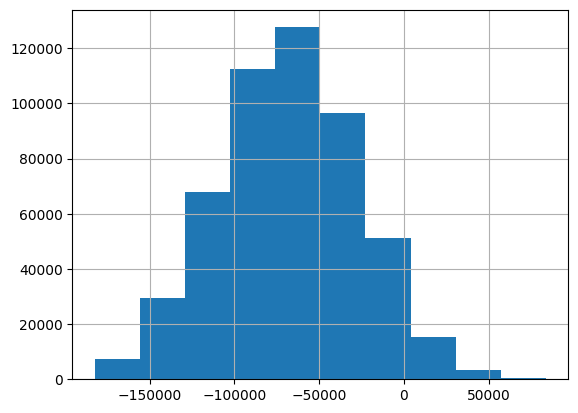

In [13]:
df['Чистая прибыль, руб'].hist()

In [14]:
df.sort_values(by='Чистая прибыль, руб').head(10)

,Площадь помещения,Цена за м2,Количество рабочих мест в openspace,Планируемая площадь для р/места в openspace,Количество рабочих мест в офисах,Планируемая площадь для р/места в офисе,Цена за месяц работы в openspace,Цена за месяц работы в офисе,Средняя ежедневная загрузка,Сумма комунальных платежей,Ежемесячные расходы,Общая занимаемая площадь,"Доходы, руб","Расходы, руб","Прибыль без НДС, руб","Чистая прибыль, руб"
7746914,110,2000,17,6.00,0,6,8000,17000,0.20,10000,25000,102.00,27200.00,255000,-227800.00,-182240.00
7747075,110,2000,17,6.00,0,7,8000,15000,0.20,10000,25000,102.00,27200.00,255000,-227800.00,-182240.00
7747082,110,2000,17,6.00,0,7,8000,16000,0.20,10000,25000,102.00,27200.00,255000,-227800.00,-182240.00
7747089,110,2000,17,6.00,0,7,8000,17000,0.20,10000,25000,102.00,27200.00,255000,-227800.00,-182240.00
7747096,110,2000,17,6.00,0,7,8000,18000,0.20,10000,25000,102.00,27200.00,255000,-227800.00,-182240.00
7747103,110,2000,17,6.00,0,7,8000,19000,0.20,10000,25000,102.00,27200.00,255000,-227800.00,-182240.00
7746928,110,2000,17,6.00,0,6,8000,19000,0.20,10000,25000,102.00,27200.00,255000,-227800.00,-182240.00
7746921,110,2000,17,6.00,0,6,8000,18000,0.20,10000,25000,102.00,27200.00,255000,-227800.00,-182240.00
7746900,110,2000,17,6.00,0,6,8000,15000,0.20,10000,25000,102.00,27200.00,255000,-227800.00,-182240.00
7746907,110,2000,17,6.00,0,6,8000,16000,0.20,10000,25000,102.00,27200.00,255000,-227800.00,-182240.00


In [15]:
df.corr()['Чистая прибыль, руб'].dropna().sort_values()

Цена за м2                                    -0.63
Расходы, руб                                  -0.62
Планируемая площадь для р/места в openspace   -0.19
Площадь помещения                             -0.17
Общая занимаемая площадь                      -0.16
Количество рабочих мест в openspace           -0.04
Планируемая площадь для р/места в офисе       -0.02
Цена за месяц работы в офисе                   0.04
Количество рабочих мест в офисах               0.08
Цена за месяц работы в openspace               0.11
Доходы, руб                                    0.67
Средняя ежедневная загрузка                    0.70
Прибыль без НДС, руб                           1.00
Чистая прибыль, руб                            1.00
Name: Чистая прибыль, руб, dtype: float64

In [16]:
def plot_scatter(x, y):
  # x = 'Средняя ежедневная загрузка'
  # y = 'Чистая прибыль, руб'
  plt.scatter(df[x], df[y])
  plt.title(f'график зависимости {y} от {x}')
  plt.grid(True)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()


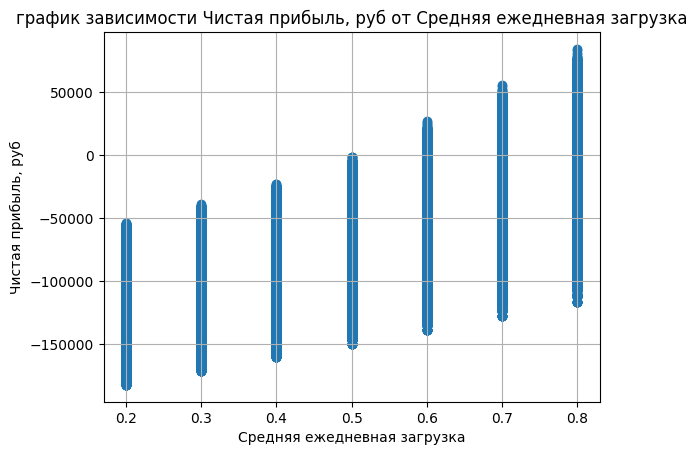

In [17]:
plot_scatter('Средняя ежедневная загрузка', 'Чистая прибыль, руб')

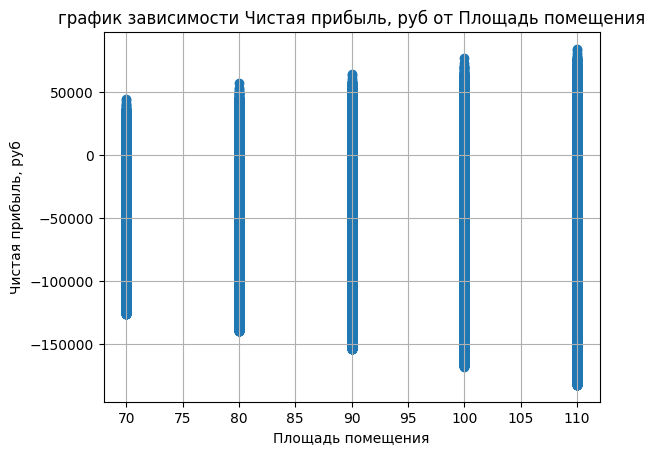

In [18]:
plot_scatter('Площадь помещения', 'Чистая прибыль, руб')

In [19]:
for s_loc in s:
  n_cases = len(df[df['Площадь помещения'] == s_loc])
  n_profit = len(df[(df['Чистая прибыль, руб'] > 0) & (df['Площадь помещения'] == s_loc)])
  n_default = len(df[(df['Чистая прибыль, руб'] < 0) & (df['Площадь помещения'] == s_loc)])

  print(f's={s_loc}м2, всего комбинаций: {n_cases}, доля прибыльных:', round((n_profit / n_default) * 100, 2), '%')

s=70м2, всего комбинаций: 76650, доля прибыльных: 2.98 %
s=80м2, всего комбинаций: 90300, доля прибыльных: 3.94 %
s=90м2, всего комбинаций: 101850, доля прибыльных: 4.55 %
s=100м2, всего комбинаций: 110250, доля прибыльных: 5.37 %
s=110м2, всего комбинаций: 132300, доля прибыльных: 5.73 %


Количество успешных комбинаций из всего массива что я нагенерил. Не очень много.

Интересно, что для 110м2 количество успешных комбинаций почти в 2 раза больше чем для помещения в 120м2. Это странно.
Увеличу квадратуру на 20м2 и посмотрим, отразится ли это на кейсах 120м2.

Перезапустил ячейки, состояние стабилизировалось. Теперь видна линейность, что выглядит адекватнее.

**Вывод:** Чем больше квадратов - тем, тем больше прибыльных кейсов. Так и должно быть, так как с увеличением квадратуры цена за м2 становится ниже. Но здесь это не учтено, так что с чем связана линейная зависимость непонятно

Оказывается благодаря вариативности

### Аналитика средней нагрузки 50%

In [20]:
df_oc50 = df.loc[df['Средняя ежедневная загрузка'] == 0.5]
df_oc50.shape

(73050, 16)

Оценим, какие факторы в наибольшей степени влияют на прибыль в такой выборке:

In [21]:
df_oc50.corr()['Чистая прибыль, руб'].dropna().sort_values()

Цена за м2                                    -0.89
Расходы, руб                                  -0.89
Планируемая площадь для р/места в openspace   -0.27
Площадь помещения                             -0.24
Общая занимаемая площадь                      -0.23
Количество рабочих мест в openspace           -0.07
Планируемая площадь для р/места в офисе       -0.03
Цена за месяц работы в офисе                   0.05
Доходы, руб                                    0.07
Количество рабочих мест в офисах               0.11
Цена за месяц работы в openspace               0.15
Чистая прибыль, руб                            1.00
Прибыль без НДС, руб                           1.00
Name: Чистая прибыль, руб, dtype: float64

Больших новостей здесь нет.

Интересно, есть ли хоть 1 прибыльный кейс с такой загрузкой и макимальной ценой за м2?

In [22]:
df_oc50[(df_oc50['Цена за м2'] == df_oc50['Цена за м2'].max()) & (df_oc50['Чистая прибыль, руб'] > 0)]

,Площадь помещения,Цена за м2,Количество рабочих мест в openspace,Планируемая площадь для р/места в openspace,Количество рабочих мест в офисах,Планируемая площадь для р/места в офисе,Цена за месяц работы в openspace,Цена за месяц работы в офисе,Средняя ежедневная загрузка,Сумма комунальных платежей,Ежемесячные расходы,Общая занимаемая площадь,"Доходы, руб","Расходы, руб","Прибыль без НДС, руб","Чистая прибыль, руб"


Хах, ни одного прибыльного кейса при половине загрузки и цене за квадрат в 2000руб. Не то что даже сверх прибыли, а даже нулевого. Это очень плохо.

Посмотрим на зависимость успешных кейсов от цены за квадрат:

In [23]:
buff = []
for price in price_perm2:
  print(price)
  buff += [df_oc50[(df_oc50['Цена за м2'] == price) & (df_oc50['Чистая прибыль, руб'] > 0)]['Чистая прибыль, руб'].count()]
print(buff)

1000
1200
1400
1600
1800
2000
[0, 0, 0, 0, 0, 0]


Упс! Нет ни одного успешного кейса. Эта **модель похоже нежизнеспособна**

Напоследок посмотрим, в самых успешных кейсах какую долю дохода приносят офисы и опеспейс. Возможно, офисы - совсем невыгодное вложение

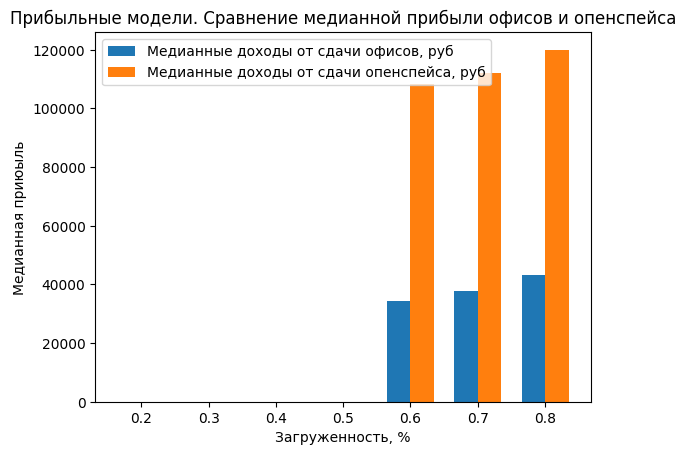

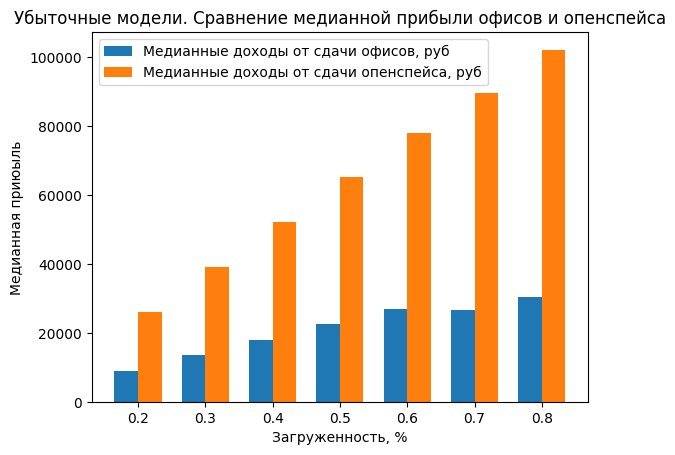

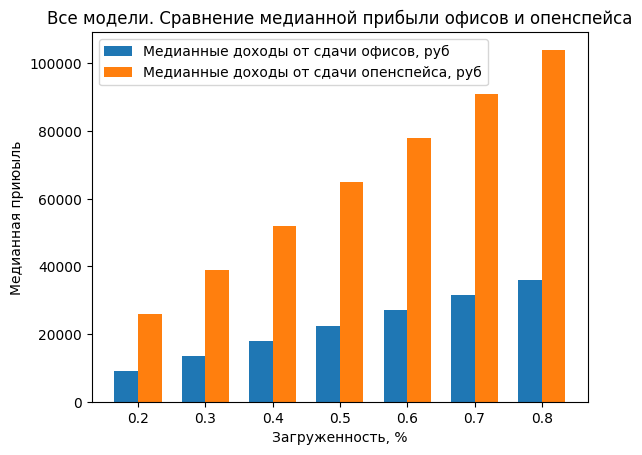

In [35]:
dict_loc = {'Прибыльные модели' : df[df['Чистая прибыль, руб'] > 0],
            'Убыточные модели' : df[df['Чистая прибыль, руб'] < 0],
            'Все модели' : df
}

for models in dict_loc.keys():

  buff_office = []
  buff_openspace = []

  df_loc = dict_loc[models]

  for occ in occupancy:
    df_loc2 = df_loc[df_loc['Средняя ежедневная загрузка'] == occ].copy()

    df_loc2['Доход от сдачи офиса, руб'] = np.ceil((df_loc2['Количество рабочих мест в офисах'] * df_loc2['Цена за месяц работы в офисе']) * occ)
    mean_profit_office = df_loc2['Доход от сдачи офиса, руб'].median()

    df_loc2['Доход от сдачи openspace, руб'] = np.ceil((df_loc2['Количество рабочих мест в openspace'] * df_loc2['Цена за месяц работы в openspace']) * occ)
    mean_profit_openspace = df_loc2['Доход от сдачи openspace, руб'].median()

    if mean_profit_office is np.nan:
      buff_office += [0]
    else:
      buff_office += [mean_profit_office]

    if mean_profit_openspace is np.nan:
      buff_openspace += [0]
    else:
      buff_openspace += [mean_profit_openspace]

  width = 0.35

  # Создаем объекты для графика
  fig, ax = plt.subplots()

  # Создаем столбцы для каждой категории
  bar1 = ax.bar(np.arange(len(occupancy)), buff_office, width, label='Медианные доходы от сдачи офисов, руб')
  bar2 = ax.bar(np.arange(len(occupancy)) + width, buff_openspace, width, label='Медианные доходы от сдачи опенспейса, руб')

  # Добавляем подписи осей и заголовок

  ax.set_xlabel('Загруженность, %')
  ax.set_ylabel('Медианная приюыль')
  ax.set_title(f'{models}. Сравнение медианной прибыли офисов и опенспейса')
  ax.set_xticks(np.arange(len(occupancy)) + width / 2)
  ax.set_xticklabels(occupancy)

  ax.legend()
  plt.show()







**Вывод №1:** Сдача офисов приносит меньшую прибыль в сравнении с опенспейсами. В среднем втрое.

*Зато, сдача офисов - это долгосрочный стабильный доход. Что является плюсом*.

**Вывод №2:** Ежемесячный уровень дохода, необходимый чтобы не вылететь в минус в этом месяце **~160 тыс. рублей**.

**Вывод №3** При понижении заполняемости коворкинга - уровень дохода  остается на прежнем уровне. Это возможно только в случае увеличения цен или уменьшения издержек.

**Предложение:** нужно найти способ **сделать коворкинг безубыточным** даже в случае 20% заполняемости

Посмотрим еще на **ТОП5 самых** прибыльных комбинаций:

In [38]:
df.sort_values('Чистая прибыль, руб', ascending=False).head()

,Площадь помещения,Цена за м2,Количество рабочих мест в openspace,Планируемая площадь для р/места в openspace,Количество рабочих мест в офисах,Планируемая площадь для р/места в офисе,Цена за месяц работы в openspace,Цена за месяц работы в офисе,Средняя ежедневная загрузка,Сумма комунальных платежей,Ежемесячные расходы,Общая занимаемая площадь,"Доходы, руб","Расходы, руб","Прибыль без НДС, руб","Чистая прибыль, руб"
6469574,110,1000,21,4.00,4,6,10000,19000,0.80,10000,25000,108.00,228800.00,145000,83800.00,83800.00
6448924,110,1000,19,4.00,5,6,10000,19000,0.80,10000,25000,106.00,228000.00,145000,83000.00,83000.00
6469567,110,1000,21,4.00,4,6,10000,18000,0.80,10000,25000,108.00,225600.00,145000,80600.00,80600.00
6448917,110,1000,19,4.00,5,6,10000,18000,0.80,10000,25000,106.00,224000.00,145000,79000.00,79000.00
6469560,110,1000,21,4.00,4,6,10000,17000,0.80,10000,25000,108.00,222400.00,145000,77400.00,77400.00


**Вывод:** Интересно, что несмотря на то, что опенспейс приносит втрое большую прибыль в медиане, и то что есть комбинации совсем без офисов, самыми прибыльными оказались модели с офисами.

Еще нужно оценить распределение прибыли в таких моделях

### Рассчитаем другую модель:

**Круглосуточный коворкинг с оплатой времени фактически проведенном внутри**

Изменения: совсем убираем